# LS88 Project

###   Imports

In [1]:
%matplotlib inline
import numpy as np
import 
import datascience as ds
from datascience import Table, make_array, predicates
import nba_py as py
from nba_py import player
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import random

### Load all the Tables

In [2]:
print("All Games")
all_games = Table().read_table('all_games.csv', sep=',')
all_games.show(5)
print('')

print('Close Games in 4th Quarter, 6 Mintues Left')
close_games_under_six = Table().read_table('PbP_15_16_trimmed.csv', sep=',')
close_games_under_six.show(5)
print('')

print('Row Ranges of Each Game in Close Games')
game_ref = Table().read_table('gamereference.csv', sep=',')
game_ref.show(5)
print('')

print('All Players and their Relevant Stats')
player_ref = Table().read_table('player_ref.csv', sep=',')
player_ref.show(5)
print('')


label_meaning = {}
label_meaning['TS%'] = 'True Shooting Percentage'
label_meaning['EFG%'] = 'Effective Field Goal Percentage'
label_meaning['PER'] = 'ESPN PER Player Rating (A way to rank NBA players)'
label_meaning['3PAr'] = '3 Point Attempt Rate'
label_meaning['G'] = 'Games'
label_meaning['MP'] = 'Minutes Played'
label_meaning['Pos'] = 'Position'
label_meaning

All Games


GAME_ID,EVENTNUM,PCTIMESTRING,TIME,PERIOD,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,POINTS_SCORED,SHOT_MADE,SHOT_TYPE,SHOT_DIST,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_NICKNAME,ASSIST_PLAYER_ID,EVENTMSGTYPE,EVENTMSGACTIONTYPE,Row Number
21500001,0,12:00,0,1,Hawks,Pistons,0,0,0,nan,nan,nan,0,nan,nan,nan,Start Period,nan,0
21500001,1,12:00,0,1,Hawks,Pistons,0,0,0,nan,nan,nan,201143,Al Horford,Hawks,nan,Jumpball,nan,1
21500001,2,11:41,19,1,Hawks,Pistons,0,0,0,0,Layup,2,203083,Andre Drummond,Pistons,nan,Miss,Driving Layup,2
21500001,3,11:39,21,1,Hawks,Pistons,0,0,0,nan,nan,nan,203145,Kent Bazemore,Hawks,nan,Rebound,Player,3
21500001,4,11:37,23,1,Hawks,Pistons,0,0,0,nan,nan,nan,203145,Kent Bazemore,Hawks,nan,Turnover,Out of Bounds - Bad Pass Turnover,4



Close Games in 4th Quarter, 6 Mintues Left


GAME_ID,EVENTNUM,PCTIMESTRING,TIME,PERIOD,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,POINTS_SCORED,SHOT_MADE,SHOT_TYPE,SHOT_DIST,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_NICKNAME,ASSIST_PLAYER_ID,EVENTMSGTYPE,EVENTMSGACTIONTYPE
21500002,474,6:32,6.53333,4,Bulls,Cavaliers,80,79,0,nan,nan,nan,2747,J.R. Smith,Cavaliers,nan,Personal Foul,P.FOUL
21500002,476,6:20,6.33333,4,Bulls,Cavaliers,82,79,2,1,Shot,15,201565,Derrick Rose,Bulls,nan,Make,Pullup Jump Shot
21500002,479,6:01,6.01667,4,Bulls,Cavaliers,82,81,2,1,Dunk,nan,202684,Tristan Thompson,Cavaliers,2590,Make,Dunk
21500002,480,5:50,5.83333,4,Bulls,Cavaliers,82,81,0,0,Layup,2,201565,Derrick Rose,Bulls,nan,Miss,Driving Layup
21500002,481,5:48,5.8,4,Bulls,Cavaliers,82,81,0,nan,nan,nan,201567,Kevin Love,Cavaliers,nan,Rebound,Player



Row Ranges of Each Game in Close Games


HOME_TEAM,AWAY_TEAM,GAME NUMBER,FIRST_INDEX,LAST_INDEX
Bulls,Cavaliers,1,0,69
Magic,Wizards,2,70,149
Celtics,76ers,3,150,224
Pistons,Jazz,4,225,301
Pacers,Raptors,5,302,396



All Players and their Relevant Stats


Player_ID,Player,First_Name,Last_Name,TS%,EFG%,PER,3PAr,G,MP,Pos
201166,Aaron Brooks,Aaron,Brooks,0.49333,0.470588,11.8,0.394,69,1108,PG
203932,Aaron Gordon,Aaron,Gordon,0.541176,0.506757,17,0.245,78,1863,PF
1626151,Aaron Harrison,Aaron,Harrison,0.386598,0.277778,4.3,0.526,21,93,SG
203940,Adreian Payne,Adreian,Payne,0.413907,0.392857,5.6,0.221,52,486,PF
201143,Al Horford,Al,Horford,0.562796,0.550781,19.4,0.244,82,2631,C


{'TS%': 'True Shooting Percentage',
 'EFG%': 'Effective Field Goal Percentage',
 'PER': 'ESPN PER Player Rating (A way to rank NBA players)',
 '3PAr': '3 Point Attempt Rate',
 'G': 'Games',
 'MP': 'Minutes Played',
 'Pos': 'Position'}

# Analysis Begins Here

In [3]:
def shots_all_players(table):
    #This function finds the number of shots that each player takes in time period
    #(it doesn't distinguish the type of shot)
    #it can be used for an entire game or for the last 6 minutes
    shots = table.where('EVENTMSGTYPE', predicates.are.containing('M'))
    players = shots.select('EVENTMSGTYPE', 'PLAYER1_NAME', 'PLAYER1_TEAM_NICKNAME', 'HOME_TEAM', 'AWAY_TEAM')
    count = players.groups(['PLAYER1_NAME', "PLAYER1_TEAM_NICKNAME"])
    return count

def seperate_teams(table):
    #This function creates two tables from the last_six_minutes_table for each team
    return table.group("PLAYER1_TEAM_NICKNAME").column(0)

def max_shot_player_each_team_name(table):
    #This takes in a table of one game (entire game or last 6 minutes)
    #It returns the player who shoots the most for each team
    team_names = seperate_teams(table)
    player_team_one = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).sort('count', descending=True).column('PLAYER1_NAME').item(0)
    player_team_two = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).sort('count', descending=True).column('PLAYER1_NAME').item(0)
    return player_team_one, player_team_two

def max_shots(table):
    #This takes in a table of one game (entire game or last 6 minutes)
    #It returns the player who shoots the most for each team
    team_names = seperate_teams(table)
    shots_player_one = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).sort('count', descending=True).column('count').item(0)
    shots_player_two = table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).sort('count', descending=True).column('count').item(0)
    return shots_player_one, shots_player_two

def total_shot_number(table):
    #returns the number of shots for each team in the last 6 minutes
    team_names = seperate_teams(table)
    total_shots1 = sum(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).column("count"))
    total_shots2 = sum(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).column("count"))
    return (total_shots1, total_shots2)

def average_player_each_team(table):
    #returns the number of shots of the average player
    team_names = seperate_teams(table)
    average_shots1 = np.average(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(0)).column("count"))
    average_shots2 = np.average(table.where("PLAYER1_TEAM_NICKNAME", team_names.item(1)).column("count"))
    return average_shots1, average_shots2




In [4]:
average_player_each_team(shots_all_players(close_games_under_six))

(28.733333333333334, 35.1875)

In [5]:
close_game_players = shots_all_players(close_games_under_six)

In [40]:
close_game_players

PLAYER1_NAME,PLAYER1_TEAM_NICKNAME,count
Aaron Brooks,Bulls,34
Aaron Gordon,Magic,35
Aaron Harrison,Hornets,1
Adreian Payne,Timberwolves,1
Al Horford,Hawks,95
Al Jefferson,Hornets,25
Al-Farouq Aminu,Trail Blazers,58
Alan Anderson,Wizards,4
Alec Burks,Jazz,50
Alex Len,Suns,30


In [6]:
close_game_ids = close_games_under_six.group('GAME_ID').column(0)

In [7]:
len(close_game_ids)

689

In [12]:
player_names = make_array()
for i in close_game_ids:
    game = close_games_under_six.where("GAME_ID", i)
    shots = shots_all_players(game)
    max_players = max_shot_player_each_team_name(shots)
    player_names = np.append(player_names, max_players)

KeyboardInterrupt: 

In [ ]:
stats = make_array()
for i in close_game_ids:
    game = close_games_under_six.where("GAME_ID", i)
    shots = shots_all_players(game)
    max_stat = max_shots(shots)
    stats = np.append(stats, max_stat)

In [ ]:
average= make_array()
for i in close_game_ids:
    game = close_games_under_six.where("GAME_ID", i)
    shots = shots_all_players(game)
    average_stat = average_player_each_team(shots)
    average = np.append(average, average_stat)
    print(average)

In [ ]:
best_players= Table().with_columns("Game", array, "Player Name", player_names, "Number Shots", stats, "Average Shots", average)

In [ ]:
best_players

In [13]:
best_players.to_csv('max_shot_players.csv')

NameError: name 'best_players' is not defined

In [8]:
x = Table().read_table('max_shot_players.csv')
x

Game,Player Name,Number Shots,Average Shots
1,Derrick Rose,5,3.33333
1,LeBron James,4,2.33333
2,Tobias Harris,5,3.4
2,Bradley Beal,5,2.6
3,Jahlil Okafor,4,1.57143
3,Terry Rozier,2,1.42857
4,Alec Burks,5,2
4,Reggie Jackson,3,1.8
5,Paul George,4,2.2
5,DeMar DeRozan,4,2.2


In [9]:
array = make_array()
k = 0
for i in np.arange(best_players.num_rows):
    if i % 2 == 0:
        k += 1
    array = np.append(array, k)

print(array)

NameError: name 'best_players' is not defined

In [10]:
def players(game): 
    # returns a list of players IDs in the table   
    players = make_array()
    
    for i in np.arange(game.num_rows):
        player_id = game.row(i).item('PLAYER1_NAME')
        if not player_id in players:
            players = players.append(player_id, players)
    
    return players

In [11]:
def find_best_player(players):
    # returns the best player based on PER
    ranking = Table()
    pers = make_array()
    for idee in players:
        per = player_ref.where('Player', idee).item(6)
        pers = pers.append(per, pers)
    
    ranking = ranking.with_column('IDs', players)
    ranking = ranking.with_column('PER', pers)

    ranking = ranking.sort('PER', True)

    return ranking.column('IDs').item(0)

In [12]:
y = x.join('Game', game_ref, 'GAME NUMBER')
y

Game,Player Name,Number Shots,Average Shots,HOME_TEAM,AWAY_TEAM,FIRST_INDEX,LAST_INDEX
1,Derrick Rose,5,3.33333,Bulls,Cavaliers,0,69
1,LeBron James,4,2.33333,Bulls,Cavaliers,0,69
2,Tobias Harris,5,3.4,Magic,Wizards,70,149
2,Bradley Beal,5,2.6,Magic,Wizards,70,149
3,Jahlil Okafor,4,1.57143,Celtics,76ers,150,224
3,Terry Rozier,2,1.42857,Celtics,76ers,150,224
4,Alec Burks,5,2,Pistons,Jazz,225,301
4,Reggie Jackson,3,1.8,Pistons,Jazz,225,301
5,Paul George,4,2.2,Pacers,Raptors,302,396
5,DeMar DeRozan,4,2.2,Pacers,Raptors,302,396


In [13]:
def split_home(game):
# This function is a helper takes a game and takes shots by home players only
    home_team = game.column('HOME_TEAM').item(0)
    home_table = game.where('PLAYER1_TEAM_NICKNAME', home_team)
    return home_table

def split_away(game):
# This function is a helper takes a game and takes shots by home players only
    away_team = game.column('AWAY_TEAM').item(0)
    away_table = game.where('PLAYER1_TEAM_NICKNAME', away_team)
    return away_table

def players(game): 
    # returns a list of players IDs in the table   
    players = make_array()
    
    for i in np.arange(game.num_rows):
        player_id = game.row(i).item('PLAYER1_NAME')
        if not player_id in players:
            players = np.append(player_id, players)
    
    return players

def find_best_player(players):
    # returns the best player based on PER
    ranking = Table(make_array('Player','Per'))
    pers = make_array()
    for idee in players:
        try:
            per = player_ref.where('Player', idee).column(6).item(0)
            print(type(per))
        except:
            per = 0
        ranking = ranking.with_row([idee, float(per)])
        
    
    ranking = ranking.sort('Per', True).where("Per", predicates.are.not_equal_to('OOPS'))
    
    print(ranking)
    return ranking.column('Player').item(0)

    

best_players = make_array()

for i in np.arange(game_ref.num_rows):
    first = int(game_ref.row(i).item('FIRST_INDEX'))
    last = int(game_ref.row(i).item('LAST_INDEX'))
    game = close_games_under_six.take(np.arange(first, last + 1))
    
    home = split_home(game)
    away = split_away(game)
    
    players_h = players(home)
    players_a = players(away)
    
    best_player_home = find_best_player(players_h)
    best_player_away = find_best_player(players_a)
    
    best_players = np.append(best_players, best_player_home)
    best_players = np.append(best_players, best_player_away)
    
best_players
   

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Pau Gasol      | 21.7
Jimmy Butler   | 21.3
Taj Gibson     | 15.7
Nikola Mirotic | 15.6
Derrick Rose   | 13.4
Tony Snell     | 6.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player              | Per
LeBron James        | 27.5
Kevin Love          | 19
Tristan Thompson    | 15.9
J.R. Smith          | 12.4
Mo Williams         | 12.4
Matthew Dellavedova | 11.3
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Nikola Vucevic | 21.1
Dewayne Dedmon | 17
Aaron Gordon   | 17
Victor Oladipo | 16.7
Tobias Harris  | 16.2
Elfrid Payton  | 13.9
Mario Hezonja  | 9.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
John Wall      | 19.8
Marcin Gortat  | 19
Bradley Beal   | 15.5
Gary Neal      | 13.5
K

<class 'float'>
<class 'float'>
Player           | Per
James Harden     | 25.3
Marcus Thornton  | 14.7
Montrezl Harrell | 14.6
Trevor Ariza     | 12.9
Corey Brewer     | 9.9
Charles Hayes    | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Hassan Whiteside | 25.7
Dwyane Wade      | 20.3
Mario Chalmers   | 17.3
Tyler Johnson    | 13.8
Justise Winslow  | 8.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Brook Lopez      | 21.7
Jarrett Jack     | 14.5
Thomas Robinson  | 14.5
Shane Larkin     | 13.3
Joe Johnson      | 12
Andrea Bargnani  | 11.8
Markel Brown     | 11.3
Bojan Bogdanovic | 10.7
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player                  | Per
Greg Monroe             | 21.8
Giannis Antetokounmpo   | 18.8
Khris Middleton         | 16.8
Michael Carter-Williams

<class 'float'>
<class 'float'>
Player         | Per
Pau Gasol      | 21.7
Jimmy Butler   | 21.3
Taj Gibson     | 15.7
Joakim Noah    | 14.1
Derrick Rose   | 13.4
E'Twaun Moore  | 11.4
Doug McDermott | 10.9
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Kevin Durant      | 28.2
Russell Westbrook | 27.6
Enes Kanter       | 24
Serge Ibaka       | 13.9
Dion Waiters      | 9.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Nikola Jokic     | 21.5
Kenneth Faried   | 21
Danilo Gallinari | 19
Will Barton      | 16
Gary Harris      | 12.7
Darrell Arthur   | 12.5
Emmanuel Mudiay  | 9.9
Jameer Nelson    | 9.5
Mike Miller      | 6.5
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Gordon Hayward | 18.3
Rudy G

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Jonas Valanciunas | 22.6
Kyle Lowry        | 22.2
DeMar DeRozan     | 21.5
Bismack Biyombo   | 14.9
Luis Scola        | 13.6
Cory Joseph       | 12.4
James Johnson     | 11.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Kemba Walker    | 20.8
Marvin Williams | 16.8
Cody Zeller     | 16.1
Jeremy Lamb     | 15.9
Nicolas Batum   | 15.6
Jeremy Lin      | 13.8
Spencer Hawes   | 12.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player             | Per
Carmelo Anthony    | 20.3
Kristaps Porzingis | 17.7
Robin Lopez        | 17.6
Jose Calderon      | 12.3
Langston Galloway  | 11.7
Arron Afflalo      | 10.9
Lance Thomas       | 10.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player     

<class 'float'>
Player            | Per
Lou Williams      | 17.7
Brandon Bass      | 17.4
Kobe Bryant       | 14.9
Jordan Clarkson   | 14.3
Julius Randle     | 13.9
D'Angelo Russell  | 13.2
Roy Hibbert       | 11.2
Nick Young        | 9.1
Metta World Peace | 0
Larry Nance Jr.   | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Kenneth Faried   | 21
Danilo Gallinari | 19
Will Barton      | 16
Emmanuel Mudiay  | 9.9
Jameer Nelson    | 9.5
Mike Miller      | 6.5
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
James Harden   | 25.3
Dwight Howard  | 18.9
Terrence Jones | 13.5
Trevor Ariza   | 12.9
Jason Terry    | 10.2
Corey Brewer   | 9.9
Ty Lawson      | 9.7
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player                  | Per
Broo

<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Nikola Jokic     | 21.5
Kenneth Faried   | 21
Danilo Gallinari | 19
Will Barton      | 16
Gary Harris      | 12.7
Emmanuel Mudiay  | 9.9
Jameer Nelson    | 9.5
Randy Foye       | 7.6
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player        | Per
Jrue Holiday  | 19.7
Ryan Anderson | 17.2
Ish Smith     | 14.9
Eric Gordon   | 13.5
Luke Babbitt  | 11.6
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Stephen Curry   | 31.5
Draymond Green  | 19.3
Klay Thompson   | 18.6
Andrew Bogut    | 15.9
Harrison Barnes | 12.3
Andre Iguodala  | 12.2
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Jonas Valanciunas | 22.6
Kyle Lowry        | 22.2
DeMar DeRozan     | 21.5
Luis Scola        | 13.6
Cory Joseph       | 12.4
DeMarre Carroll   | 11.9

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Damian Lillard  | 22.2
Ed Davis        | 18.7
Mason Plumlee   | 17.2
Al-Farouq Aminu | 12.7
Allen Crabbe    | 12.2
CJ McCollum     | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player             | Per
Karl-Anthony Towns | 22.5
Ricky Rubio        | 17.6
Andrew Wiggins     | 16.5
Zach LaVine        | 14.3
Kevin Martin       | 11.5
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Jahlil Okafor    | 17.1
Nerlens Noel     | 16.2
Robert Covington | 13.2
Jerami Grant     | 12.6
Isaiah Canaan    | 11.1
Hollis Thompson  | 9.2
TJ McConnell     | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Mirza Teletovic | 16.2
Jon Leuer       | 16.2
Brandon Knight  | 14.7
Markieff Morris | 12.2
Devin Booker    | 11.9
Sonny Weems     | 3.7
PJ Tuc

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Eric Bledsoe    | 20
Mirza Teletovic | 16.2
Brandon Knight  | 14.7
Alex Len        | 12.4
Markieff Morris | 12.2
Ronnie Price    | 9.6
TJ Warren       | 0
PJ Tucker       | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Ricky Rubio     | 17.6
Gorgui Dieng    | 17.1
Andrew Wiggins  | 16.5
Zach LaVine     | 14.3
Kevin Garnett   | 12.3
Nemanja Bjelica | 11.2
Tayshaun Prince | 6.3
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Nikola Vucevic   | 21.1
Aaron Gordon     | 17
Victor Oladipo   | 16.7
Tobias Harris    | 16.2
Andrew Nicholson | 14.8
Evan Fournier    | 14.6
Elfrid Payton    | 13.9
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player       | Per
Mike Conley  

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Kyle Lowry        | 22.2
DeMar DeRozan     | 21.5
Bismack Biyombo   | 14.9
Luis Scola        | 13.6
Cory Joseph       | 12.4
Patrick Patterson | 10.6
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Chris Paul     | 26.2
Blake Griffin  | 22.1
DeAndre Jordan | 20.6
Jamal Crawford | 14
JJ Redick      | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player                  | Per
Greg Monroe             | 21.8
Giannis Antetokounmpo   | 18.8
Khris Middleton         | 16.8
Jabari Parker           | 14.8
Michael Carter-Williams | 13.9
Rashad Vaughn           | 4.2
O.J. Mayo               | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Lou Williams     | 17.7
Julius Randle    | 13.9
D'Angelo Russell | 13.2
Roy Hibbert      | 11.2
Ro

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player              | Per
Nikola Jokic        | 21.5
Kenneth Faried      | 21
Danilo Gallinari    | 19
Will Barton         | 16
Joffrey Lauvergne   | 15.7
Gary Harris         | 12.7
Darrell Arthur      | 12.5
Jameer Nelson       | 9.5
Randy Foye          | 7.6
Kostas Papanikolaou | 6
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Derrick Favors | 21.6
Gordon Hayward | 18.3
Trevor Booker  | 14.4
Alec Burks     | 14.3
Rodney Hood    | 14.1
Trey Lyles     | 11.6
Joe Ingles     | 10.3
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Stephen Curry  | 31.5
Draymond Green | 19.3
Klay Thompson  | 18.6
Festus Ezeli   | 17.7
Andre Iguodala | 12.2
Brandon Rush   | 10.1
<class 'float'>
<cl

<class 'float'>
<class 'float'>
Player         | Per
Paul George    | 20.9
Myles Turner   | 15.4
Monta Ellis    | 13.7
George Hill    | 13.2
Rodney Stuckey | 12.6
Lavoy Allen    | 12.4
Solomon Hill   | 12.2
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player             | Per
Karl-Anthony Towns | 22.5
Ricky Rubio        | 17.6
Andrew Wiggins     | 16.5
Zach LaVine        | 14.3
Kevin Garnett      | 12.3
Tyus Jones         | 11.2
Tayshaun Prince    | 6.3
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Gordon Hayward | 18.3
Jeff Withey    | 17.7
Trevor Booker  | 14.4
Rodney Hood    | 14.1
Trey Burke     | 14
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Nikola Jokic   | 21.5
Kenneth Faried | 21
Will Barton    | 16
Gary Harris    | 12.7
Jameer Nelson  | 9.5
Randy Foye     | 7.6
Mike Mi

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Gordon Hayward | 18.3
Jeff Withey    | 17.7
Rudy Gobert    | 17.5
Trey Lyles     | 11.6
Joe Ingles     | 10.3
Raul Neto      | 10.2
Chris Johnson  | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Dirk Nowitzki   | 19
Dwight Powell   | 16.8
Zaza Pachulia   | 16.2
Deron Williams  | 14.6
Devin Harris    | 13.1
Raymond Felton  | 11.9
Wesley Matthews | 10.9
Jose Juan Barea | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player             | Per
Karl-Anthony Towns | 22.5
Ricky Rubio        | 17.6
Andrew Wiggins     | 16.5
Shabazz Muhammad   | 15.2
Nemanja Bjelica    | 11.2
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Chris Paul       | 26.2
DeAndre Jordan   | 20.6
Jamal Crawford   | 14
Austin Rive

<class 'float'>
Player           | Per
Damian Lillard   | 22.2
Ed Davis         | 18.7
Mason Plumlee    | 17.2
Al-Farouq Aminu  | 12.7
Allen Crabbe     | 12.2
Meyers Leonard   | 11.3
Gerald Henderson | 0
CJ McCollum      | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player              | Per
LeBron James        | 27.5
Kyrie Irving        | 19.9
Kevin Love          | 19
Tristan Thompson    | 15.9
Timofey Mozgov      | 14.6
J.R. Smith          | 12.4
Matthew Dellavedova | 11.3
Iman Shumpert       | 8.4
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Chris Paul       | 26.2
Cole Aldrich     | 21.3
DeAndre Jordan   | 20.6
Jamal Crawford   | 14
Lance Stephenson | 13.5
Austin Rivers    | 11.1
Wesley Johnson   | 11
Pablo Prigioni   | 10.2
JJ Redick        | 0
Luc Mbah a Moute | 0
<class 'float'>
<class 'flo

<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Damian Lillard   | 22.2
Mason Plumlee    | 17.2
Maurice Harkless | 13.3
Al-Farouq Aminu  | 12.7
Allen Crabbe     | 12.2
Meyers Leonard   | 11.3
Chris Kaman      | 11.1
Gerald Henderson | 0
CJ McCollum      | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Lou Williams     | 17.7
Brandon Bass     | 17.4
Kobe Bryant      | 14.9
Jordan Clarkson  | 14.3
Julius Randle    | 13.9
D'Angelo Russell | 13.2
Tarik Black      | 12.3
Nick Young       | 9.1
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player             | Per
Karl-Anthony Towns | 22.5
Gorgui Dieng       | 17.1
Andrew Wiggins     | 16.5
Shabazz Muhammad   | 15.2
Zach LaVine        | 14.3
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player                 | Per
M

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Derrick Favors | 21.6
Gordon Hayward | 18.3
Rudy Gobert    | 17.5
Rodney Hood    | 14.1
Trey Lyles     | 11.6
Joe Ingles     | 10.3
Raul Neto      | 10.2
Chris Johnson  | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Nikola Vucevic   | 21.1
Aaron Gordon     | 17
Victor Oladipo   | 16.7
Andrew Nicholson | 14.8
Evan Fournier    | 14.6
Elfrid Payton    | 13.9
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Kawhi Leonard     | 26
LaMarcus Aldridge | 22.4
Patty Mills       | 14.6
Rasual Butler     | 13.4
Kyle Anderson     | 12.9
Danny Green       | 10.5
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Jahlil Okafor    | 17.1
Ish Smith        | 14.9
Robert Covington | 13.2
Jerami

Player        | Per
James Harden  | 25.3
Dwight Howard | 18.9
Trevor Ariza  | 12.9
Jason Terry   | 10.2
Corey Brewer  | 9.9
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Damian Lillard   | 22.2
Mason Plumlee    | 17.2
Brian Roberts    | 13.8
Al-Farouq Aminu  | 12.7
Allen Crabbe     | 12.2
Meyers Leonard   | 11.3
CJ McCollum      | 0
Gerald Henderson | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Kemba Walker    | 20.8
Al Jefferson    | 18.2
Marvin Williams | 16.8
Cody Zeller     | 16.1
Nicolas Batum   | 15.6
Courtney Lee    | 11.5
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player       | Per
Paul George  | 20.9
Ian Mahinmi  | 16.6
Myles Turner | 15.4
Monta Ellis  | 13.7
George Hill  | 13.2
Solomon Hill | 12.2
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
DeMarcus Cousins | 23.6
Rajon Rondo      | 16.9
Darren Collison  | 15.9
Rudy Gay         | 15.5
Quincy Acy       | 14.7
Omri Casspi      | 13.9
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Paul Millsap     | 21.3
Al Horford       | 19.4
Jeff Teague      | 17.9
Dennis Schroder  | 15.5
Kent Bazemore    | 13.4
Thabo Sefolosha  | 12.4
Kyle Korver      | 9.7
Tim Hardaway Jr. | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Jonas Valanciunas | 22.6
Kyle Lowry        | 22.2
DeMar DeRozan     | 21.5
Bismack Biyombo   | 14.9
Terrence Ross     | 12.9
Cory Joseph       | 12.4
Patrick Patterson | 10.6
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Pa

<class 'float'>
Player           | Per
Zach Randolph    | 18.3
JaMychal Green   | 14.6
Lance Stephenson | 13.5
Tony Allen       | 12.9
Vince Carter     | 12.7
Ray McCallum     | 9.1
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player           | Per
Stephen Curry    | 31.5
Draymond Green   | 19.3
Klay Thompson    | 18.6
Shaun Livingston | 13.8
Harrison Barnes  | 12.3
Ian Clark        | 11.5
Anderson Varejao | 11.1
Brandon Rush     | 10.1
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player            | Per
Kawhi Leonard     | 26
LaMarcus Aldridge | 22.4
Tony Parker       | 16.2
Patty Mills       | 14.6
Boris Diaw        | 14
Danny Green       | 10.5
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player             | Per
David Lee          | 19.6
Dirk Nowitzki      | 19
Salah Mejri        | 1

<class 'float'>
Player           | Per
James Harden     | 25.3
Michael Beasley  | 22.5
Dwight Howard    | 18.9
Patrick Beverley | 13
Trevor Ariza     | 12.9
Jason Terry      | 10.2
Corey Brewer     | 9.9
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player                | Per
Giannis Antetokounmpo | 18.8
John Henson           | 18.6
Khris Middleton       | 16.8
Jabari Parker         | 14.8
Tyler Ennis           | 10.7
Rashad Vaughn         | 4.2
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player         | Per
Jon Leuer      | 16.2
Tyson Chandler | 14.7
Brandon Knight | 14.7
Alex Len       | 12.4
Devin Booker   | 11.9
John Jenkins   | 10
Ronnie Price   | 9.6
PJ Tucker      | 0
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
Player          | Per
Dirk Nowitzki   | 19
Zaza Pachulia   | 16.2
Devin Harris    | 13.1
Justin Ande

array(['Pau Gasol', 'LeBron James', 'Nikola Vucevic', ...,
       'Ramon Sessions', 'Dirk Nowitzki', 'Boban Marjanovic'],
      dtype='<U32')

In [14]:
best_players

array(['Pau Gasol', 'LeBron James', 'Nikola Vucevic', ...,
       'Ramon Sessions', 'Dirk Nowitzki', 'Boban Marjanovic'],
      dtype='<U32')

In [39]:
y = y.with_column('Best_Player', best_players)
y

Game,Player Name,Number Shots,Average Shots,HOME_TEAM,AWAY_TEAM,FIRST_INDEX,LAST_INDEX,Best_Player
1,Derrick Rose,5,3.33333,Bulls,Cavaliers,0,69,Pau Gasol
1,LeBron James,4,2.33333,Bulls,Cavaliers,0,69,LeBron James
2,Tobias Harris,5,3.4,Magic,Wizards,70,149,Nikola Vucevic
2,Bradley Beal,5,2.6,Magic,Wizards,70,149,John Wall
3,Jahlil Okafor,4,1.57143,Celtics,76ers,150,224,Isaiah Thomas
3,Terry Rozier,2,1.42857,Celtics,76ers,150,224,Jahlil Okafor
4,Alec Burks,5,2,Pistons,Jazz,225,301,Andre Drummond
4,Reggie Jackson,3,1.8,Pistons,Jazz,225,301,Derrick Favors
5,Paul George,4,2.2,Pacers,Raptors,302,396,Paul George
5,DeMar DeRozan,4,2.2,Pacers,Raptors,302,396,Jonas Valanciunas


In [46]:
best_name = y.where('Player Name', predicates.are.equal_to, 'Best_Player')
best_name.num_rows/y.num_rows

0.18313953488372092

# Comparing the max shooter to the average shooter

In [48]:
np.average((best_name.column('Number Shots'))-(best_name.column('Average Shots')))

2.1560137944066513

In [49]:
np.average((y.column('Number Shots'))-y.column('Average Shots'))

1.9142502422480618

# QUESTION 2

In [51]:
def shot_type(table):
    ## takes in a table and returns counts of how many shots were assisted/not assisted
    
    table = table.where('SHOT_MADE', 1)
    table = table.with_column('ASSIST_PLAYER_ID', table.apply(lambda x: str(x), 'ASSIST_PLAYER_ID'))

    # Create Assist Table
    a = table.where('ASSIST_PLAYER_ID', predicates.are.not_equal_to('nan'))
    a_count = a.num_rows

    # Create Unassisted Table
    ua = table.where('ASSIST_PLAYER_ID', predicates.are.equal_to('nan'))
    ua_count = ua.num_rows
    
    return [a_count, ua_count]

def prort(a, ua):
    try:
        p = ua /(a + ua)
    except ZeroDivisionError:
        p = 0 
    return p

def distance(p1, p2):
    return abs(p1 - p2)

def game_by_game(games, game_indicies):
    #takes in the games table and the game indicies table, isolates all games 1 by 1, 
    #and calcs the test statistic.
    shots = make_array()
    for i in np.arange(game_indicies.num_rows):
        rowi = game_indicies.row(i)
        i1 = int(rowi.item(3))
        i2 = int(rowi.item(4))
        gamei = games.take(np.arange(i1, i2))
        a_and_u = shot_type(gamei)
        a = a_and_u[0]
        au = a_and_u[1]
        p = prort(a, au)
        shots = np.append(p[1], shots)
    return shots
                      

In [ ]:
shot_type(close_games_under_six)
x = game_by_game(close_games_under_six, game_ref)
# FIX THIS
y = game_by_game(all_games, game_ref)
t = Table().with_columns('Close Games', x, 'All Games', y)
t.hist()

In [56]:
#Helper...
def test(floatz1):
    x = str(floatz1)
    y = x.split('.')
    if(y[1] == '0'):
        time = str(floatz1).replace('.', ':') + '0'
    else:
        time = str(floatz1).replace('.', ':')
    return time


#Helper...
def six_minute_period(timestamp):
    floatz = float(timestamp.replace(':', '.'))
    if floatz > 6:
        endpoint1 = "{0:.2f}".format(floatz - 6) 
    else:
        endpoint1 = "{0:.2f}".format(floatz + 6) 
    return test(endpoint1)


#Helper...
def out_back_steakhouse_minus(timestamp):
    split = timestamp.split(':')
    if split[1] == '00':
        part_minus = str(int(split[0]) - 1) + ':' + '59'
    else:
        if int(split[1]) < 11:
            part_minus = split[0] + ':' + '0' + str(int(split[1]) - 1) 
        else:
            part_minus = split[0] + ':' + str(int(split[1]) - 1)    
    return part_minus

#Helper...
def out_back_steakhouse_plus(timestamp):
    split = timestamp.split(':')
    if split[1] == '59':
        part_plus = str(int(split[0]) + 1) + ':' + '00'
    elif split[1] == '00':
        part_plus = split[0] + ':' + '01'
    else:
        if int(split[1]) < 9:
            part_plus = split[0] + ':' + '0' + str(int(split[1]) + 1) 
        else:
            part_plus = split[0] + ':' + str(int(split[1]) + 1) 
    return part_plus

#Helper...
def check_validity(time):
    if float(time.replace(':', '.')) < 0:
        return False
    if float(time.replace(':', '.')) > 12:
        return False
    return True

#Helper...
def find_valid_row_more(time, dist, table):
    if not check_validity(time):
        return null
    print(time)
    if table.where('PCTIMESTRING', time).num_rows > 0:
        return [time, dist]
    return find_valid_row_more(out_back_steakhouse_plus(time), dist + 1, table)
        
#Helper...
def find_valid_row_less(time, dist, table):
    if not check_validity(time):
        return null
    if table.where('PCTIMESTRING', time).num_rows > 0:
        return [time, dist]
    return find_valid_row_less(out_back_steakhouse_minus(time), dist + 1, table)
    
        
#YES FINALLY WHAT I WANTED LMAO
def find_closest_endpoint(table, timestamp):
    endpoint = six_minute_period(timestamp)
    less = find_valid_row_less(endpoint, 0, table)
    more = find_valid_row_more(endpoint, 0, table)
    if (less[1] < more[1]):
        return less[0]
    return more[0]
        
print(out_back_steakhouse_plus('8:09'))

8:10


In [53]:
def calc_test_statistic(table):
    a_and_u = shot_type(table)
    a = a_and_u[0]
    au = a_and_u[1]
    p = prort(a, au)
    return p

def get_six_minute_interval(anyz, last_six, gr_all, gr_last):
    
    # get a random game from all games.
    rowi = random.randint(0, gr_all.num_rows - 1)
    rand_game_id = gr_all.row(rowi).item('GAME_ID')
    game = anyz.where('GAME_ID', rand_game_id)

    # get a randoom quarter from that game
    quarter = random.randint(1, 4)
    game = game.where('PERIOD', quarter)

    # Get a random start timestamp
    row_game = game.row(random.randint(0, game.num_rows - 1))
    row_number_start = row_game.item(game.num_columns - 1)
    time_start = row_game.item('PCTIMESTRING')

    # find the 6 minute endpoint timestamp.
    time_endpoint = find_closest_endpoint(game, time_start)

    # take just that (approx) 6 minute interval of the table
    row_number_end = game.where('PCTIMESTRING', time_endpoint).row(0).item(anyz.num_columns - 1)
    if row_number_end > row_number_start:
        six_min_slice = anyz.take(np.arange(row_number_start, row_number_end + 1))
    else:
        six_min_slice = anyz.take(np.arange(row_number_end, row_number_start + 1))

    return six_min_slice

def calculate(anyz, last_six, gr_all, gr_last):
    
    anyone = make_array()
    lastones = make_array()
    
    for i in np.arange(gr_last.num_rows):
        print('Iteration Count is: ' + str(i))
        
        six_minutes = get_six_minute_interval(anyz, last_six, gr_all, gr_last)
        
        # calculate the test statistic
        kappa = calc_test_statistic(six_minutes)
        
        # append test statistic to array
        print('Test statistic ANY 6 is: ' + str(kappa))
        anyone = np.append(kappa, anyone)

        # get a random 6 minute period from all close games.
        row1 = random.randint(0, gr_last.num_rows - 1)
        first1 = int(gr_last.row(row1).item('FIRST_INDEX'))
        last1 = int(gr_last.row(row1).item('LAST_INDEX'))
        game1 = last_six.take(np.arange(first1, last1 + 1))
        
        # calcualte the test statistic 
        last = calc_test_statistic(game1)
        print('Test statistic LAST 6 is : ' + str(last))
        lastones = np.append(last, lastones)
        
        print('')
        print('NEW ITERATION')
        print('')
            
    both = Table().with_columns('Last 6', lastones, 'Any 6', anyone)
    return both


In [64]:
# table_x_1 = calculate(all_games, close_games_under_six, all_games.group('GAME_ID'), game_ref)
# table_x_1.to_csv('question_2_1.csv')

In [61]:
table_x_1

Last 6,Any 6
0.454545,0.375
0.5,0.454545
1,0.3
0.2,0.5
0.666667,0.25
0.5,0.363636
0.416667,0.555556
0.461538,0.214286
0.272727,0.272727
0.375,0.636364


Average of Last 6: 0.4729005670951635
Median of Last 6: 0.46153846153846156
STD of Last 6: 0.18135903801761316
 
 
 
Average of Any 6: 0.412581659130693
Median of Any 6: 0.4
STD of Any 6: 0.16459841022435334


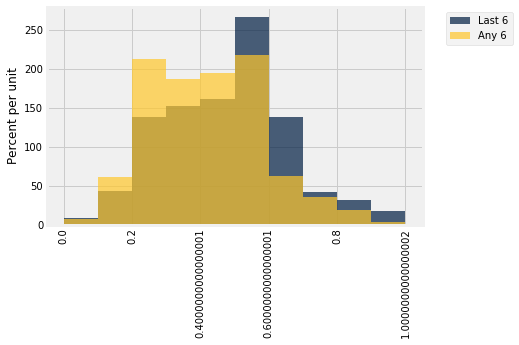

In [83]:
table_x_1.hist()
last_6 = table_x_1.column('Last 6')
any_6 = table_x_1.column('Any 6')

print('Average of Last 6: ' + str(np.mean(last_6)))
print('Median of Last 6: ' + str(np.median(last_6)))
print('STD of Last 6: ' + str(np.std(last_6)))

print(' ')
print(' ')
print(' ')

print('Average of Any 6: ' + str(np.mean(any_6)))
print('Median of Any 6: ' + str(np.median(any_6)))
print('STD of Any 6: ' + str(np.std(any_6)))



# QUESTION 2 PART 2

## Goal: Figure out if more unassited or assited shots are taken in last 6 on a team by team basis

In [69]:
def split_game_teams(table):
# This function is a helper takes a game and splits it into two tables, one for shots taken by each team
    return null


def team_bins(last, last_ref):
    ## Write a function that:
    # Iterates through each game in last games
    # For each game:
         # Call split_game_teams to split the game
         # Calculate test statistic for each table returned by split_game_teams: (u/(u+a))
         # Store this in the team array. There should be 30 arrays for 30 teams. Each array should be of length 82.
    # put all these arrays as columns in a 30 column table, and return that table
    return null
        

# For testing the team_bins
def test_team_bins(team_table):
    assert team_table.num_columns == 30, 'Team number ' + str(team_table.num_columns) + ' should be 30'
    assert team_table.num_rows == 82, 'Games number ' + str(team_table.num_columns) + ' should be 82'
    for c in np.arange(0, 30):
        for r in np.arange(0, 82):
            assert team_table.column(c).item(r) <= 1 and team_table.column(c).item(r) >= 0, 'column ' + srt(c) + 'row ' + srt(r) + ' proportion is invalid'
    print('Table passed!')
    return null


# QUESTION 3

In [60]:
def best_player_last_six(allz, last, last_ref, all_ref):
    # This function takes in the last_six table, 
        # for each game in last:
            # calls split_game_teams
            # determines the best player for each table returned by split_game_teams
            # for each table returned:
                # calculates (u/(u+a)) just for best player only in the last 6 minutes.
                # calculates (u/(u+a)) for all other players only in the last 6 minutes.
                # calculates (u/(u+a)) for all players in the last 6 minutes.
                # calculates (u/(u+a)) for all other players in the entire game.
                # calculates (u/(u+a)) for all players in the entire game.
    # returns a table with 30 columns
        # column 1: Game Number
        # column 2: Team Name
        # column 3: Best Player
        # column 4: (u/(u+a)) just for best player only in the last 6 minutes.
        # column 5: (u/(u+a)) for all other players only in the last 6 minutes.
        # column 6: (u/(u+a)) for all players in the last 6 minutes.
        # column 7: (u/(u+a)) for all other players in the entire game.
        # column 8: (u/(u+a)) for all players in the entire game.
    return null


def test_best_player_last_six(best_games):
    #tests the best_player_function
    assert best_games.num_columns == 8, 'Column number ' + str(best_games.num_columns) + ' should be ' + str(8)
    assert best_games.num_rows == game_ref.num_rows * 2, 'Row number ' + str(best_games) + ' should be ' + str(game_ref.num_rows * 2)


            

